In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 1

In [4]:
data_A = pd.read_csv("Final_Project/datasets/DetectorA.csv")
data_B = pd.read_csv("Final_Project/datasets/DetectorB.csv")
data_C = pd.read_csv("Final_Project/datasets/DetectorC.csv")
data_Target = pd.read_csv("Final_Project/datasets/DetectorTarget.csv")


# Step 2

In [5]:
data_A.keys()

Index(['id', 'cnn_score', 'energy'], dtype='object')

In [6]:
energy_A = data_A.values[:, 2]

In [7]:
cut_energy_A = energy_A[data_A.values[:,1]>0.10]

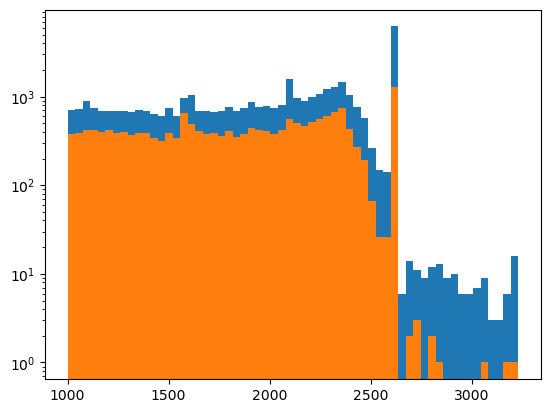

In [74]:
total_SS_counts, total_SS_bins, total_SS_width = plt.hist(energy_A, bins=60, log="log")
SS_counts, SS_bins, SS_bwidth =plt.hist(cut_energy_A, bins=60, log="log")



In [75]:
peak_mask_cut = (SS_bins >= 1590.)& (SS_bins <= 1595.)
base_mask_cut = (SS_bins > 1545.)& (SS_bins < 1590.)

In [76]:
peak_mask = (total_SS_bins >= 1590.)& (total_SS_bins <= 1595.)
base_mask = (total_SS_bins > 1545.)& (total_SS_bins < 1590.)

In [77]:
tau = (1595. - 1590.)/(1590. - 1545.)

In [80]:
eff = ( np.sum(SS_counts[peak_mask_cut[1:]]) - tau*np.sum(SS_counts[base_mask_cut[1:]])  )/ \
        (np.sum(total_SS_counts[peak_mask[1:]]) - tau*np.sum(total_SS_counts[base_mask[1:]]))
            

In [81]:
print(f'The true positive rate with the classification score {0.10}  is {np.round(eff,3)*100}%')

The true positive rate with the classification score 0.1  is 69.8%


# Step 3

In [14]:
data_B.keys()

Index(['id', 'cnn_score', 'energy'], dtype='object')

In [18]:
energy_B = data_B.values[:, 2]

In [35]:
cut_energy_B = energy_B[data_B.values[:,1]< 0.05]

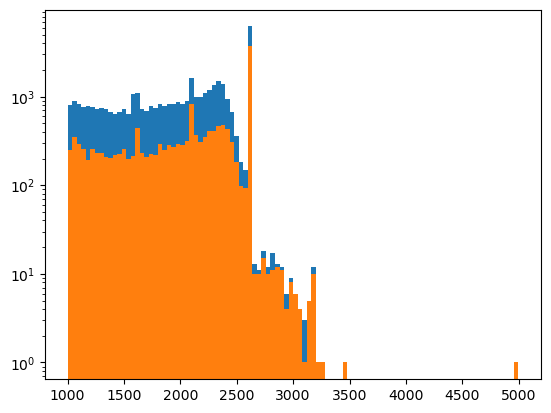

In [51]:
total_MS_counts, total_MS_bins, total_MS_width = plt.hist(energy_B, bins=100, log="log")
MS_counts, MS_bins, MS_bwidth =plt.hist(cut_energy_B, bins=100, log="log")

In [58]:
MS_peak_mask_cut = (MS_bins >= 2060.)& (MS_bins <= 2120.)
left_MS_base_mask_cut = (MS_bins > 2015.)& (MS_bins < 2100.)
right_MS_base_mask_cut = (MS_bins > 2105.)& (MS_bins < 2115.)

In [94]:
total_MS_peak_mask = (total_MS_bins >= 2060.)& (total_MS_bins <= 2120.)
total_left_MS_base_mask = (total_MS_bins > 2015.) & (total_MS_bins < 2100.)
total_right_MS_base_mask = (total_MS_bins > 2105.)& (total_MS_bins < 2115.)

In [95]:
tau = (2060. - 2120.)/ ((2100. - 2015.)+ (2115. - 2105))

In [96]:
eff_B = ( np.sum(MS_counts[MS_peak_mask_cut[1:]]) - \
         tau* np.sum(MS_counts[left_MS_base_mask_cut[1:]|right_MS_base_mask_cut[1:]])  )/ \
        (np.sum(total_MS_counts[total_MS_peak_mask[1:]]) - \
         tau* np.sum(total_MS_counts[total_left_MS_base_mask[1:]|total_right_MS_base_mask[1:]]))

In [98]:
print(f'The true positive rate with the classification score {0.05}  is {np.round(eff_B,3)*100}%')

The true positive rate with the classification score 0.05  is 42.0%


# Step 4

array([[<Axes: title={'center': 'energy'}>]], dtype=object)

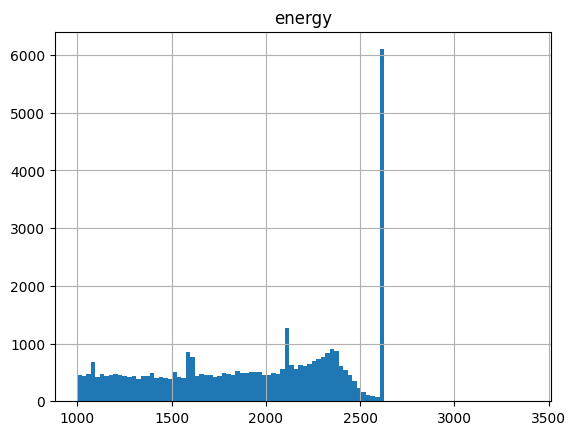

In [13]:
data_C.hist(column="energy", bins=100)

array([[<Axes: title={'center': 'energy'}>]], dtype=object)

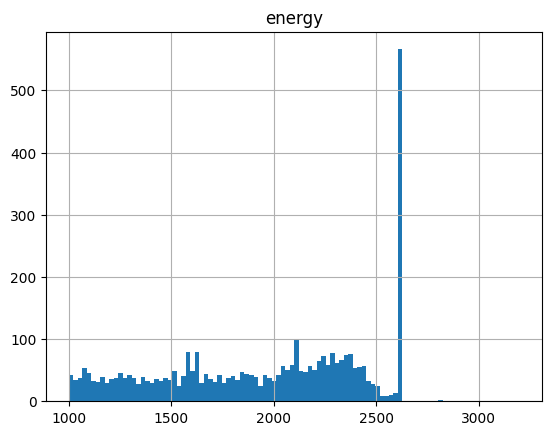

In [12]:
data_Target.hist(column="energy", bins=100)